In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
data = pd.read_csv('D:\Developments\SMT 4\Ensamble Learning\Bagging\ecoli\ecoli.csv')
data

,mcg,gvh,lip,chg,aac,alm1,alm2,label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     336 non-null    float64
 1   gvh     336 non-null    float64
 2   lip     336 non-null    float64
 3   chg     336 non-null    float64
 4   aac     336 non-null    float64
 5   alm1    336 non-null    float64
 6   alm2    336 non-null    float64
 7   label   336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


In [4]:
data.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [5]:
data.isna().sum()

mcg      0
gvh      0
lip      0
chg      0
aac      0
alm1     0
alm2     0
label    0
dtype: int64

================================================================================================================================================

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


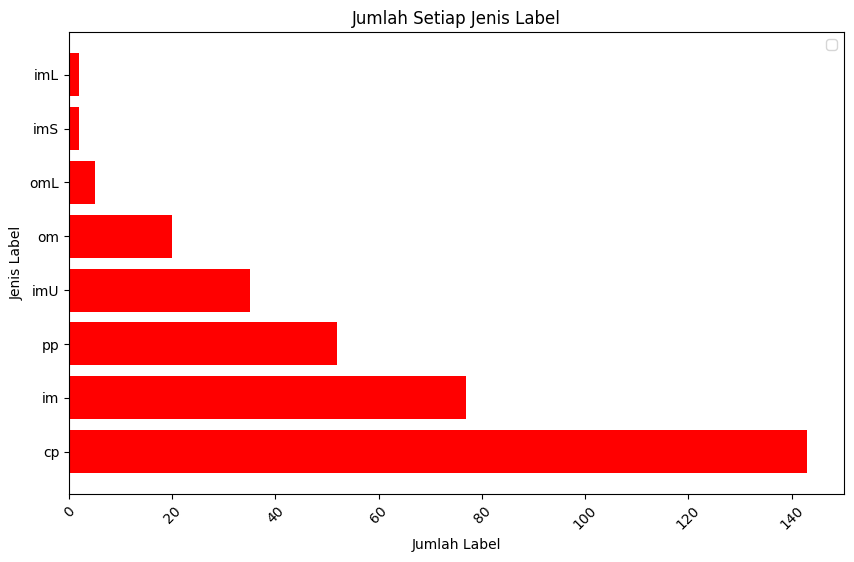

In [6]:
# Hitung jumlah setiap jenis label
label_counts = data['label'].value_counts()

# Buat plot batang
plt.figure(figsize=(10, 6))
plt.barh(label_counts.index, label_counts.values, color='r')
plt.xlabel('Jumlah Label')
plt.ylabel('Jenis Label')
plt.title('Jumlah Setiap Jenis Label')
plt.legend()
plt.xticks(rotation=45)
plt.show()

=====================================================================================================================================================

                                                    Tahapan Pemodelan Data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = data.iloc[:,0:7]
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=10 )

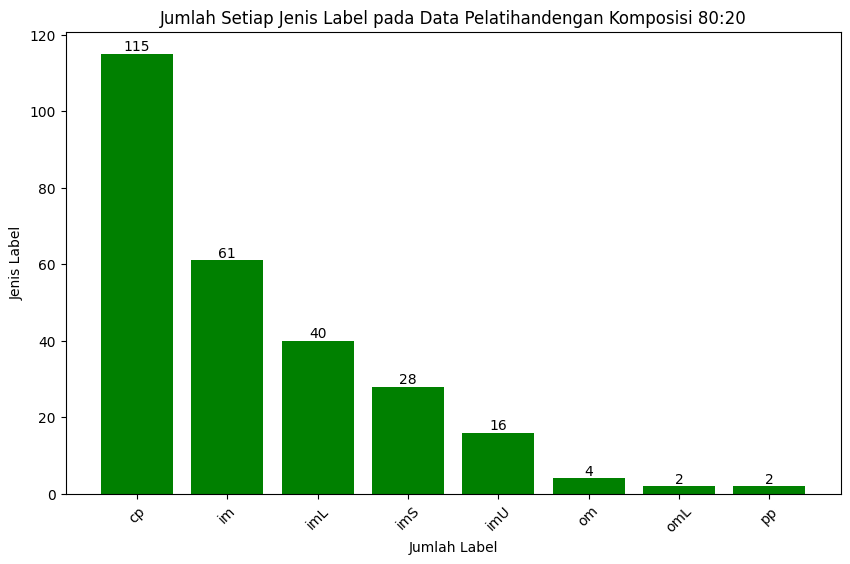

In [9]:
# Hitung jumlah setiap jenis label
label_count = y_train.value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(np.unique(y_train),label_count.values, color='g')

# Menambahkan teks di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom')

plt.xlabel('Jumlah Label')
plt.ylabel('Jenis Label')
plt.title('Jumlah Setiap Jenis Label pada Data Pelatihandengan Komposisi 80:20')
plt.xticks(rotation=45)
plt.show()

In [10]:
y_train.value_counts()

label
cp     115
im      61
pp      40
imU     28
om      16
omL      4
imL      2
imS      2
Name: count, dtype: int64

================================= Pemodelan dengan Menggunakan Metode Ensamble Bagging ===============================

Tanpa dilakukan penghandle an imbalance class

# Mencoba Pemodelan Ensamble Bagging 

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [12]:
# Define base classifiers
base_classifiers = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(kernel='linear', random_state=42))
]

# Initialize dictionaries to store results
results = {name: {'test_size': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for name, _ in base_classifiers}

# Iterate through different test sizes
for test_size in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print(f"Test Size: {test_size}")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Train and evaluate Bagging classifiers for each base classifier
    for name, clf in base_classifiers:
        print(f"Model: {name}")

        # Define Bagging classifier with the base classifier
        bagging_classifier = BaggingClassifier(estimator=clf, n_estimators=10, random_state=42)

        # Train the Bagging classifier
        bagging_classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = bagging_classifier.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store results
        results[name]['test_size'].append(test_size)
        results[name]['accuracy'].append(accuracy)
        results[name]['precision'].append(precision)
        results[name]['recall'].append(recall)
        results[name]['f1_score'].append(f1)

        # Print results
        print(f"Accuracy: {accuracy}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print("-----------------------------------")
        print('\n')

    print('\n')

# Print results dictionary
print("Results Dictionary:")
print(results)

Test Size: 0.1
Model: Gaussian Naive Bayes
Accuracy: 0.9411764705882353
Confusion Matrix:
[[18  0  0  0  0  1]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.9607843137254901
Recall: 0.9411764705882353
F1-score: 0.9437201907790145
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])


Accuracy: 1.0
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-----------------------------------


Model: Decision Tree
Accuracy: 0.9705882352941176
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  3]]
Precision: 0.9754901960784315
Recall: 0.9705882352941176
F1-score: 0.9698242933537052
-----------------------------------


Model: KNN
Accuracy: 1.0
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-----------------------------------


Model: SVM
Accuracy: 0.8823529411764706
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  4]]
Precision

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\n

Accuracy: 0.8970588235294118
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  5  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8861344537815126
Recall: 0.8970588235294118
F1-score: 0.8889747215032554
-----------------------------------


Model: Decision Tree
Accuracy: 0.8676470588235294
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  2  0  2  0  0  0]
 [ 0  0  0  0  5  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  1  0  0  8]]
Precision: 0.8520308123249298
Recall: 0.8676470588235294
F1-score: 0.8570730719545469
-----------------------------------


Model: KNN
Accuracy: 0.8970588235294118
Confusion Matrix:
[[32  0  0  0  0  0  0  0]
 [ 2 10  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 0  1  0  0  3  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  0  9]]
Precision: 0.89691876750

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy: 0.900990099009901
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  7  0  0  0]
 [ 0  0  0  0  6  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8993648255686262
Recall: 0.900990099009901
F1-score: 0.8941450345015671
-----------------------------------


Model: Decision Tree
Accuracy: 0.8712871287128713
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  5  0  6  0  0  0]
 [ 0  1  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  1  0  0 12]]
Precision: 0.865806871110973
Recall: 0.8712871287128713
F1-score: 0.8640392437161589
-----------------------------------


Model: KNN
Accuracy: 0.900990099009901
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  2  0  9  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8937739947464135
Recall: 0.900990099009901
F1-score: 0.89494968

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy: 0.8666666666666667
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 26  0  2  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  7  0  7  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8539232445114798
Recall: 0.8666666666666667
F1-score: 0.8547321528016377
-----------------------------------


Model: Decision Tree
Accuracy: 0.8444444444444444
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 22  0  6  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  5  0  9  0  0  0]
 [ 1  0  0  0  6  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  1  0  1 14]]
Precision: 0.8405601297758161
Recall: 0.8444444444444444
F1-score: 0.8392406806169921
-----------------------------------


Model: KNN
Accuracy: 0.8592592592592593
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 23  0  4  0  1  0]
 [ 0  0  0  1  0  0  1]
 [ 0  5  0  9  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8506041850869438
Recall: 0.8592592592592593
F1-score: 0.851

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [13]:
# Initialize an empty list to store individual dictionaries
data = []

# Iterate through base classifiers
for name, metrics in results.items():
    # Iterate through the list of test sizes
    for i in range(len(metrics['test_size'])):
        # Create a dictionary for each row of data
        row_data = {
            'Model': name,
            'Test Size': metrics['test_size'][i],
            'Accuracy': metrics['accuracy'][i],
            'Precision': metrics['precision'][i],
            'Recall': metrics['recall'][i],
            'F1 Score': metrics['f1_score'][i]
        }
        # Append the dictionary to the list
        data.append(row_data)

# Create a DataFrame from the list of dictionaries
df_results = pd.DataFrame(data)

# Print DataFrame
print("Results DataFrame:")
df_results

Results DataFrame:


,Model,Test Size,Accuracy,Precision,Recall,F1 Score
0,Gaussian Naive Bayes,0.1,0.941176,0.960784,0.941176,0.943720
1,Gaussian Naive Bayes,0.2,0.764706,0.783690,0.764706,0.744021
2,Gaussian Naive Bayes,0.3,0.752475,0.707973,0.752475,0.708511
3,Gaussian Naive Bayes,0.4,0.785185,0.728299,0.785185,0.740620
4,Gaussian Naive Bayes,0.5,0.761905,0.679068,0.761905,0.704488
5,Random Forest,0.1,1.000000,1.000000,1.000000,1.000000
6,Random Forest,0.2,0.897059,0.886134,0.897059,0.888975
7,Random Forest,0.3,0.900990,0.899365,0.900990,0.894145
8,Random Forest,0.4,0.866667,0.853923,0.866667,0.854732
9,Random Forest,0.5,0.839286,0.827134,0.839286,0.824049


In [14]:
# Determine the bin edges for grouping by test_size
bin_edges = np.arange(0.05, 0.6, 0.1)  

# Group by test_size bins
grouped_results = df_results.groupby(pd.cut(df_results['Test Size'], bin_edges))

# Print grouped results
for group_name, group_data in grouped_results:
    print(f"Test Size Group: {group_name}")
    print(group_data)
    print("\n")

Test Size Group: (0.05, 0.15]
                   Model  Test Size  Accuracy  Precision    Recall  F1 Score
0   Gaussian Naive Bayes        0.1  0.941176   0.960784  0.941176  0.943720
5          Random Forest        0.1  1.000000   1.000000  1.000000  1.000000
10         Decision Tree        0.1  0.970588   0.975490  0.970588  0.969824
15                   KNN        0.1  1.000000   1.000000  1.000000  1.000000
20                   SVM        0.1  0.882353   0.816807  0.882353  0.844771


Test Size Group: (0.15, 0.25]
                   Model  Test Size  Accuracy  Precision    Recall  F1 Score
1   Gaussian Naive Bayes        0.2  0.764706   0.783690  0.764706  0.744021
6          Random Forest        0.2  0.897059   0.886134  0.897059  0.888975
11         Decision Tree        0.2  0.867647   0.852031  0.867647  0.857073
16                   KNN        0.2  0.897059   0.896919  0.897059  0.894475
21                   SVM        0.2  0.808824   0.818514  0.808824  0.777559


Test Size Gr

C:\Users\-MSI-\AppData\Local\Temp\ipykernel_15904\2472391598.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_results = df_results.groupby(pd.cut(df_results['Test Size'], bin_edges))


<Figure size 1200x800 with 0 Axes>

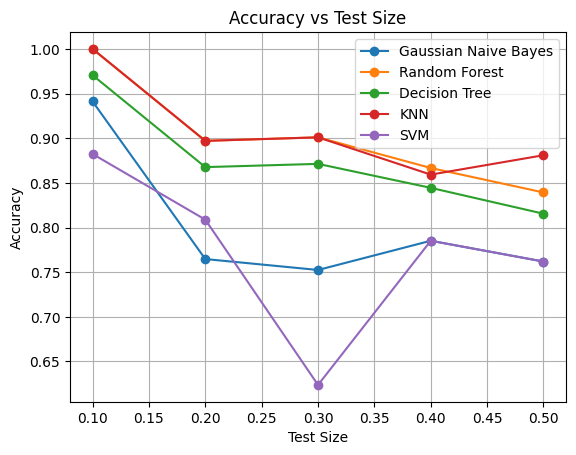

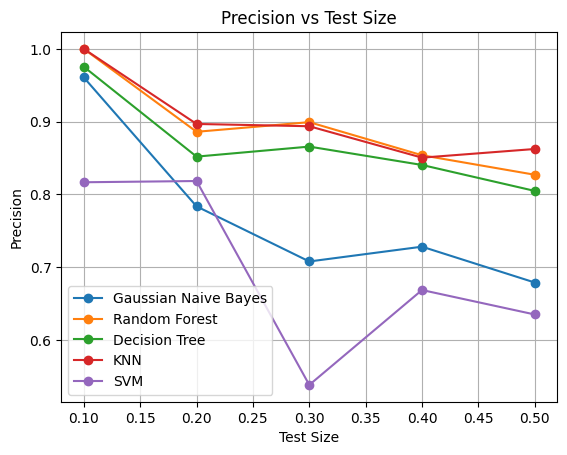

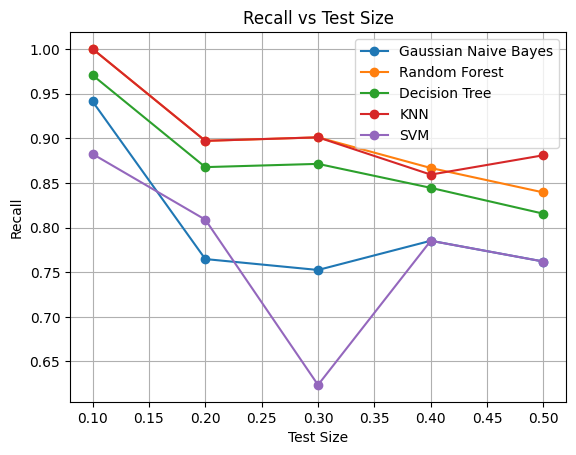

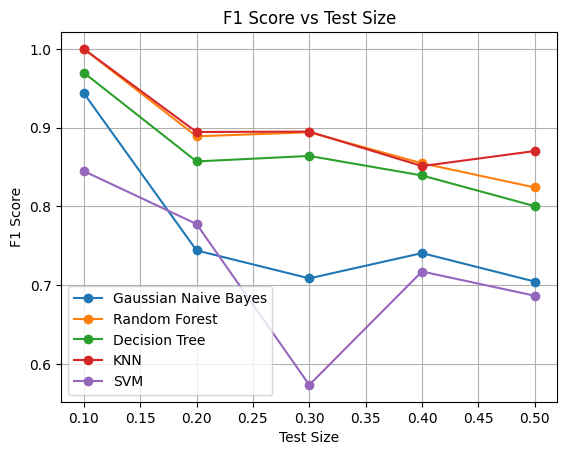

In [15]:
# Plotting line charts for each metric
models = df_results['Model'].unique()

plt.figure(figsize=(12, 8))

# Plotting for each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.figure()
    plt.title(metric + ' vs Test Size')

    for model in models:
        model_data = df_results[df_results['Model'] == model]
        plt.plot(model_data['Test Size'], model_data[metric], marker='o', label=model)

    plt.xlabel('Test Size')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

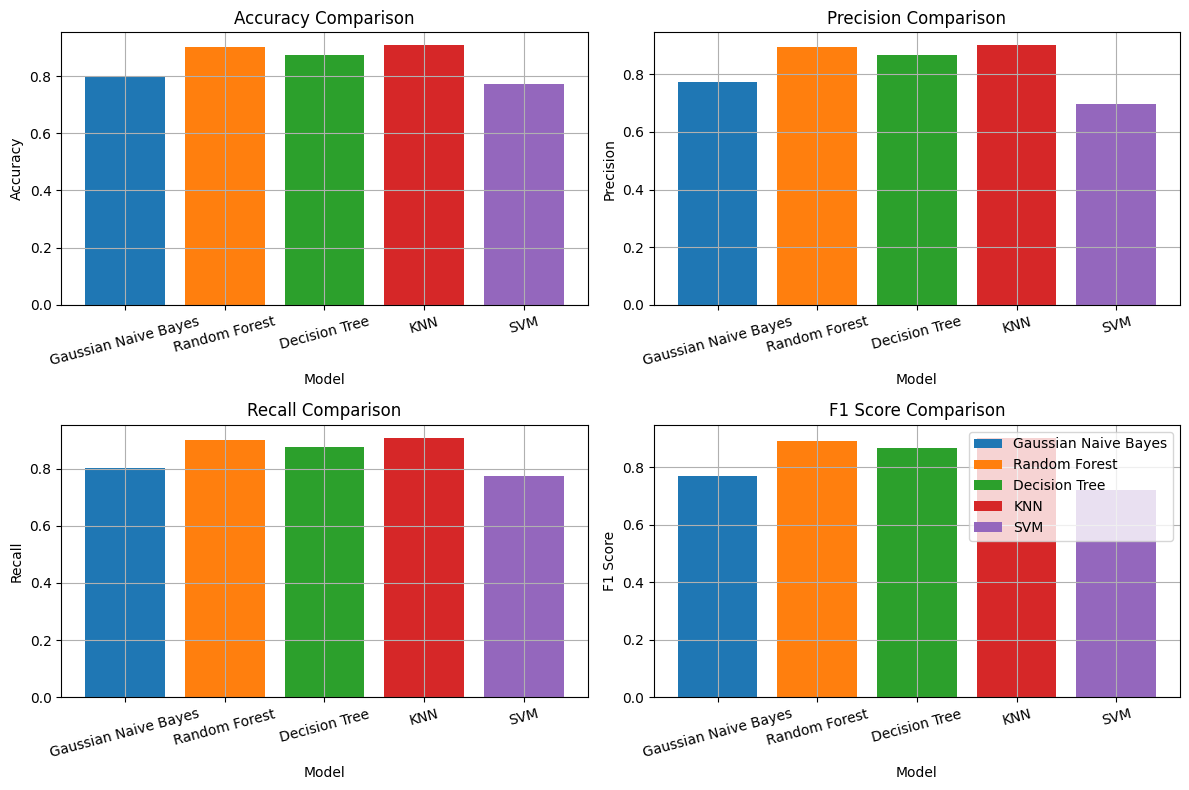

In [23]:
# Plotting barplots for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = df_results['Model'].unique()

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.title(metric + ' Comparison')

    for model in models:
        model_data = df_results[df_results['Model'] == model]
        plt.bar(model, model_data[metric].mean(), label=model)

    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=15)
    
    plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

=====

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define base classifiers
base_classifiers = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(kernel='linear', random_state=42))
]

# Initialize dictionaries to store results
results = {name: {'test_size': [], 'n_estimators': [], 'n_jobs': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for name, _ in base_classifiers}

# Iterate through different test sizes
for test_size in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print(f"Test Size: {test_size}")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Iterate through different numbers of estimators
    for n_estimators in [100, 200, 300, 400, 500]:
        print(f"Number of Estimators: {n_estimators}")

            # Train and evaluate Bagging classifiers for each base classifier
        for name, clf in base_classifiers:
            print(f"Model: {name}")

            # Define Bagging classifier with the base classifier
            bagging_classifier = BaggingClassifier(estimator=clf, n_estimators=n_estimators, n_jobs=2, random_state=42)

            # Train the Bagging classifier
            bagging_classifier.fit(X_train, y_train)

            # Make predictions
            y_pred = bagging_classifier.predict(X_test)

            # Calculate evaluation metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')

            # Store results
            results[name]['test_size'].append(test_size)
            results[name]['n_estimators'].append(n_estimators)
            results[name]['accuracy'].append(accuracy)
            results[name]['precision'].append(precision)
            results[name]['recall'].append(recall)
            results[name]['f1_score'].append(f1)

            # Print results
            print(f"Accuracy: {accuracy}")
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))
            print("Precision:", precision)
            print("Recall:", recall)
            print("F1-score:", f1)
            print("-----------------------------------")
            print('\n')

    print('\n')

# Print results dictionary
print("Results Dictionary:")
print(results)


Test Size: 0.1
Number of Estimators: 100
Model: Gaussian Naive Bayes
Accuracy: 0.9117647058823529
Confusion Matrix:
[[18  0  0  0  0  1]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  0  2]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.9495798319327731
Recall: 0.9117647058823529
F1-score: 0.9086934528110999
-----------------------------------


Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-----------------------------------


Model: Decision Tree
Accuracy: 0.9705882352941176
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  3]]
Precision: 0.9754901960784315
Recall: 0.9705882352941176
F1-score: 0.9698242933537052
-----------------------------------


Model: KNN
Accuracy: 1.0
Confusion Matrix:
[[19  0  0  

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9117647058823529
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.8756302521008403
Recall: 0.9117647058823529
F1-score: 0.8859477124183008
-----------------------------------


Number of Estimators: 200
Model: Gaussian Naive Bayes
Accuracy: 0.9117647058823529
Confusion Matrix:
[[18  0  0  0  0  1]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  0  2]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.9495798319327731
Recall: 0.9117647058823529
F1-score: 0.9086934528110999
-----------------------------------


Model: Random Forest
Accuracy: 0.9705882352941176
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  3]]
Precision: 0.9754901960784315
Recall: 0.9705882352941176
F1-score: 0.9698242933537052
-----------------------------------


Model: Decision Tree
Accuracy: 

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9117647058823529
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.8756302521008403
Recall: 0.9117647058823529
F1-score: 0.8859477124183008
-----------------------------------


Number of Estimators: 300
Model: Gaussian Naive Bayes
Accuracy: 0.9117647058823529
Confusion Matrix:
[[18  0  0  0  0  1]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  0  2]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.9495798319327731
Recall: 0.9117647058823529
F1-score: 0.9086934528110999
-----------------------------------


Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-----------------------------------


Model: Decision Tree
Accuracy: 0.9705882352941176
Confusion Matrix:
[[19  0  0  0  0  0]
 [

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9117647058823529
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.8756302521008403
Recall: 0.9117647058823529
F1-score: 0.8859477124183008
-----------------------------------


Number of Estimators: 400
Model: Gaussian Naive Bayes
Accuracy: 0.9117647058823529
Confusion Matrix:
[[18  0  0  0  0  1]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  0  2]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.9495798319327731
Recall: 0.9117647058823529
F1-score: 0.9086934528110999
-----------------------------------


Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-----------------------------------


Model: Decision Tree
Accuracy: 0.9705882352941176
Confusion Matrix:
[[19  0  0  0  0  0]
 [

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9117647058823529
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.8756302521008403
Recall: 0.9117647058823529
F1-score: 0.8859477124183008
-----------------------------------


Number of Estimators: 500
Model: Gaussian Naive Bayes
Accuracy: 0.9117647058823529
Confusion Matrix:
[[18  0  0  0  0  1]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  0  2]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.9495798319327731
Recall: 0.9117647058823529
F1-score: 0.9086934528110999
-----------------------------------


Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-----------------------------------


Model: Decision Tree
Accuracy: 0.9705882352941176
Confusion Matrix:
[[19  0  0  0  0  0]
 [

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9117647058823529
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.8756302521008403
Recall: 0.9117647058823529
F1-score: 0.8859477124183008
-----------------------------------




Test Size: 0.2
Number of Estimators: 100
Model: Gaussian Naive Bayes
Accuracy: 0.75
Confusion Matrix:
[[30  1  0  0  0  0  1]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  0  0  0  0]
 [ 0  0  0  0  2  0  4]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0  8]]
Precision: 0.7356423852963645
Recall: 0.75
F1-score: 0.7241930618401207
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9117647058823529
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8993697478991596
Recall: 0.9117647058823529
F1-score: 0.9032986328859903
-----------------------------------


Model: Decision Tree
Accuracy: 0.8676470588235294
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2  9  0  2  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0  8]]
Precision: 0.8556605975723622
Recall: 0.8676470588235294
F1-score: 0.858732806555458
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8823529411764706
Confusion Matrix:
[[31  0  0  0  0  0  1]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8677912341407151
Recall: 0.8823529411764706
F1-score: 0.8744206773618538
-----------------------------------


Model: SVM
Accuracy: 0.8382352941176471
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  0  0  0  0]
 [ 0  0  0  0  4  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.7859506302521008
Recall: 0.8382352941176471
F1-score: 0.8064401293646416
-----------------------------------


Number of Estimators: 200
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.75
Confusion Matrix:
[[30  1  0  0  0  0  1]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  0  0  0  0]
 [ 0  0  0  0  2  0  4]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0  8]]
Precision: 0.7356423852963645
Recall: 0.75
F1-score: 0.7241930618401207
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9117647058823529
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8993697478991596
Recall: 0.9117647058823529
F1-score: 0.9032986328859903
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8676470588235294
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0  7]]
Precision: 0.8554096638655463
Recall: 0.8676470588235294
F1-score: 0.8573831906857182
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8823529411764706
Confusion Matrix:
[[31  0  0  0  0  0  1]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8677912341407151
Recall: 0.8823529411764706
F1-score: 0.8744206773618538
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8382352941176471
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  0  0  0  0]
 [ 0  0  0  0  4  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.7859506302521008
Recall: 0.8382352941176471
F1-score: 0.8064401293646416
-----------------------------------


Number of Estimators: 300
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.75
Confusion Matrix:
[[30  1  0  0  0  0  1]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  0  0  0  0]
 [ 0  0  0  0  2  0  4]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0  8]]
Precision: 0.7356423852963645
Recall: 0.75
F1-score: 0.7241930618401207
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9117647058823529
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8993697478991596
Recall: 0.9117647058823529
F1-score: 0.9032986328859903
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8676470588235294
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0  7]]
Precision: 0.8554096638655463
Recall: 0.8676470588235294
F1-score: 0.8573831906857182
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8823529411764706
Confusion Matrix:
[[31  0  0  0  0  0  1]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8677912341407151
Recall: 0.8823529411764706
F1-score: 0.8744206773618538
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8382352941176471
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  0  0  0  0]
 [ 0  0  0  0  4  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.7859506302521008
Recall: 0.8382352941176471
F1-score: 0.8064401293646416
-----------------------------------


Number of Estimators: 400
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.75
Confusion Matrix:
[[30  1  0  0  0  0  1]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  0  0  0  0]
 [ 0  0  0  0  2  0  4]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0  8]]
Precision: 0.7356423852963645
Recall: 0.75
F1-score: 0.7241930618401207
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9117647058823529
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8993697478991596
Recall: 0.9117647058823529
F1-score: 0.9032986328859903
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8676470588235294
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0  7]]
Precision: 0.8554096638655463
Recall: 0.8676470588235294
F1-score: 0.8573831906857182
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8823529411764706
Confusion Matrix:
[[31  0  0  0  0  0  1]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8677912341407151
Recall: 0.8823529411764706
F1-score: 0.8744206773618538
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8382352941176471
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  0  0  0  0]
 [ 0  0  0  0  4  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.7859506302521008
Recall: 0.8382352941176471
F1-score: 0.8064401293646416
-----------------------------------


Number of Estimators: 500
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.75
Confusion Matrix:
[[30  1  0  0  0  0  1]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  0  0  0  0]
 [ 0  0  0  0  2  0  4]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0  8]]
Precision: 0.7356423852963645
Recall: 0.75
F1-score: 0.7241930618401207
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9117647058823529
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8993697478991596
Recall: 0.9117647058823529
F1-score: 0.9032986328859903
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8676470588235294
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0  7]]
Precision: 0.8554096638655463
Recall: 0.8676470588235294
F1-score: 0.8573831906857182
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8823529411764706
Confusion Matrix:
[[31  0  0  0  0  0  1]
 [ 2 10  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8677912341407151
Recall: 0.8823529411764706
F1-score: 0.8744206773618538
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8235294117647058
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  0  0  0  0]
 [ 0  0  0  0  3  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.7766180510665803
Recall: 0.8235294117647058
F1-score: 0.7894004874209076
-----------------------------------




Test Size: 0.3
Number of Estimators: 100
Model: Gaussian Naive Bayes
Accuracy: 0.7524752475247525
Confusion Matrix:
[[44  1  0  0  0  0  1]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0]
 [ 0  0  0  0  2  0  5]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0 12]]
Precision: 0.7079728310222201
Recall: 0.7524752475247525
F1-score: 0.7085105094949723
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8910891089108911
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  7  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8913202711131806
Recall: 0.8910891089108911
F1-score: 0.8837731536410244
-----------------------------------


Model: Decision Tree
Accuracy: 0.8712871287128713
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 16  0  2  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  7  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0 11]]
Precision: 0.8653690346851899
Recall: 0.8712871287128713
F1-score: 0.8648842730050237
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.900990099009901
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  2  0  9  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8937739947464135
Recall: 0.900990099009901
F1-score: 0.8949496865767099
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7821782178217822
Confusion Matrix:
[[45  1  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0]
 [ 0  0  0  0  2  2  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.7281368791528108
Recall: 0.7821782178217822
F1-score: 0.732265459024
-----------------------------------


Number of Estimators: 200
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7524752475247525
Confusion Matrix:
[[44  1  0  0  0  0  1]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0]
 [ 0  0  0  0  2  0  5]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0 12]]
Precision: 0.7079728310222201
Recall: 0.7524752475247525
F1-score: 0.7085105094949723
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8811881188118812
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  5  0  6  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8848631036573045
Recall: 0.8811881188118812
F1-score: 0.8721751402145108
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8613861386138614
Confusion Matrix:
[[45  0  0  0  0  0  1]
 [ 2 16  0  2  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  7  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0 11]]
Precision: 0.8543159081794467
Recall: 0.8613861386138614
F1-score: 0.8555642416577843
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8811881188118812
Confusion Matrix:
[[45  1  0  0  0  0  0]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  3  0  8  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8766814181418141
Recall: 0.8811881188118812
F1-score: 0.8757129492731603
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7821782178217822
Confusion Matrix:
[[45  1  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0]
 [ 0  0  0  0  2  1  4]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.7234775896944532
Recall: 0.7821782178217822
F1-score: 0.7302590083789354
-----------------------------------


Number of Estimators: 300
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7524752475247525
Confusion Matrix:
[[44  1  0  0  0  0  1]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0]
 [ 0  0  0  0  2  0  5]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0 12]]
Precision: 0.7079728310222201
Recall: 0.7524752475247525
F1-score: 0.7085105094949723
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8811881188118812
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  5  0  6  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8848631036573045
Recall: 0.8811881188118812
F1-score: 0.8721751402145108
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8613861386138614
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 15  0  3  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  7  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0 11]]
Precision: 0.8541587832252613
Recall: 0.8613861386138614
F1-score: 0.8553330521022027
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8910891089108911
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  3  0  8  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8845487865113041
Recall: 0.8910891089108911
F1-score: 0.8846209185082655
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7821782178217822
Confusion Matrix:
[[45  1  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0]
 [ 0  0  0  0  2  0  5]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.7227827833717156
Recall: 0.7821782178217822
F1-score: 0.7301178177892883
-----------------------------------


Number of Estimators: 400
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7524752475247525
Confusion Matrix:
[[44  1  0  0  0  0  1]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0]
 [ 0  0  0  0  2  0  5]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0 12]]
Precision: 0.7079728310222201
Recall: 0.7524752475247525
F1-score: 0.7085105094949723
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8811881188118812
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  5  0  6  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8848631036573045
Recall: 0.8811881188118812
F1-score: 0.8721751402145108
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8712871287128713
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 16  0  2  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  7  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0 11]]
Precision: 0.8653690346851899
Recall: 0.8712871287128713
F1-score: 0.8648842730050237
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8910891089108911
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  3  0  8  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8845487865113041
Recall: 0.8910891089108911
F1-score: 0.8846209185082655
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7821782178217822
Confusion Matrix:
[[45  1  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0]
 [ 0  0  0  0  2  0  5]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.7227827833717156
Recall: 0.7821782178217822
F1-score: 0.7301178177892883
-----------------------------------


Number of Estimators: 500
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7524752475247525
Confusion Matrix:
[[44  1  0  0  0  0  1]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0]
 [ 0  0  0  0  2  0  5]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0 12]]
Precision: 0.7079728310222201
Recall: 0.7524752475247525
F1-score: 0.7085105094949723
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8910891089108911
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  7  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8913202711131806
Recall: 0.8910891089108911
F1-score: 0.8837731536410244
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8712871287128713
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 16  0  2  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  7  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0 11]]
Precision: 0.8653690346851899
Recall: 0.8712871287128713
F1-score: 0.8648842730050237
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8910891089108911
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  3  0  8  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8845487865113041
Recall: 0.8910891089108911
F1-score: 0.8846209185082655
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7821782178217822
Confusion Matrix:
[[45  1  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0]
 [ 0  0  0  0  2  0  5]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.7227827833717156
Recall: 0.7821782178217822
F1-score: 0.7301178177892883
-----------------------------------




Test Size: 0.4
Number of Estimators: 100
Model: Gaussian Naive Bayes
Accuracy: 0.7777777777777778
Confusion Matrix:
[[60  1  0  0  0  0  1]
 [ 2 27  0  1  0  0  0]
 [ 0  1  0  0  0  0  1]
 [ 0 14  0  0  0  0  0]
 [ 0  0  0  0  2  0  6]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0 15]]
Precision: 0.7243462924622344
Recall: 0.7777777777777778
F1-score: 0.7295609756097561
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8666666666666667
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 24  0  4  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  5  0  9  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8558404558404559
Recall: 0.8666666666666667
F1-score: 0.8581272145300327
-----------------------------------


Model: Decision Tree
Accuracy: 0.8666666666666667
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 22  0  6  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  2  0 12  0  0  0]
 [ 0  0  0  0  6  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0 14]]
Precision: 0.8611003011691006
Recall: 0.8666666666666667
F1-score: 0.8602391766419948
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8666666666666667
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 21  0  7  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  2  0 12  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8680626780626781
Recall: 0.8666666666666667
F1-score: 0.8597248906375127
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8
Confusion Matrix:
[[61  1  0  0  0  0  0]
 [ 2 28  0  0  0  0  0]
 [ 0  1  0  0  0  0  1]
 [ 0 14  0  0  0  0  0]
 [ 0  0  0  0  2  0  6]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.7354233762748256
Recall: 0.8
F1-score: 0.7457816779225993
-----------------------------------


Number of Estimators: 200
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7777777777777778
Confusion Matrix:
[[60  1  0  0  0  0  1]
 [ 2 27  0  1  0  0  0]
 [ 0  1  0  0  0  0  1]
 [ 0 14  0  0  0  0  0]
 [ 0  0  0  0  2  0  6]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0 15]]
Precision: 0.7243462924622344
Recall: 0.7777777777777778
F1-score: 0.7295609756097561
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8740740740740741
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 25  0  3  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  5  0  9  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8624023527249334
Recall: 0.8740740740740741
F1-score: 0.8649679350319553
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8518518518518519
Confusion Matrix:
[[61  0  0  0  0  0  1]
 [ 2 22  0  6  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  3  0 11  0  0  0]
 [ 0  0  0  0  6  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0 14]]
Precision: 0.8460795120517343
Recall: 0.8518518518518519
F1-score: 0.8464630339151412
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8518518518518519
Confusion Matrix:
[[61  1  0  0  0  0  0]
 [ 2 21  0  7  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  3  0 11  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8505909806567702
Recall: 0.8518518518518519
F1-score: 0.8457542241167972
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8
Confusion Matrix:
[[61  1  0  0  0  0  0]
 [ 2 28  0  0  0  0  0]
 [ 0  1  0  0  0  0  1]
 [ 0 14  0  0  0  0  0]
 [ 0  0  0  0  2  0  6]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.7354233762748256
Recall: 0.8
F1-score: 0.7457816779225993
-----------------------------------


Number of Estimators: 300
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7777777777777778
Confusion Matrix:
[[60  1  0  0  0  0  1]
 [ 2 27  0  1  0  0  0]
 [ 0  1  0  0  0  0  1]
 [ 0 14  0  0  0  0  0]
 [ 0  0  0  0  2  0  6]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0 15]]
Precision: 0.7243462924622344
Recall: 0.7777777777777778
F1-score: 0.7295609756097561
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8814814814814815
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 26  0  2  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  5  0  9  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8697293447293448
Recall: 0.8814814814814815
F1-score: 0.8718575701958723
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8518518518518519
Confusion Matrix:
[[61  0  0  0  0  0  1]
 [ 2 22  0  6  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  3  0 11  0  0  0]
 [ 0  0  0  0  6  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0 14]]
Precision: 0.8460795120517343
Recall: 0.8518518518518519
F1-score: 0.8464630339151412
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8592592592592593
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 21  0  7  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  3  0 11  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.858101664417454
Recall: 0.8592592592592593
F1-score: 0.8525155422516937
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8
Confusion Matrix:
[[61  1  0  0  0  0  0]
 [ 2 28  0  0  0  0  0]
 [ 0  1  0  0  0  0  1]
 [ 0 14  0  0  0  0  0]
 [ 0  0  0  0  2  0  6]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.7354233762748256
Recall: 0.8
F1-score: 0.7457816779225993
-----------------------------------


Number of Estimators: 400
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7777777777777778
Confusion Matrix:
[[60  1  0  0  0  0  1]
 [ 2 27  0  1  0  0  0]
 [ 0  1  0  0  0  0  1]
 [ 0 14  0  0  0  0  0]
 [ 0  0  0  0  2  0  6]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0 15]]
Precision: 0.7243462924622344
Recall: 0.7777777777777778
F1-score: 0.7295609756097561
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8740740740740741
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 25  0  3  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  5  0  9  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8624023527249334
Recall: 0.8740740740740741
F1-score: 0.8649679350319553
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8518518518518519
Confusion Matrix:
[[61  0  0  0  0  0  1]
 [ 2 22  0  6  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  3  0 11  0  0  0]
 [ 0  0  0  0  6  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0 14]]
Precision: 0.8460795120517343
Recall: 0.8518518518518519
F1-score: 0.8464630339151412
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8592592592592593
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 21  0  7  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  3  0 11  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.858101664417454
Recall: 0.8592592592592593
F1-score: 0.8525155422516937
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8
Confusion Matrix:
[[61  1  0  0  0  0  0]
 [ 2 28  0  0  0  0  0]
 [ 0  1  0  0  0  0  1]
 [ 0 14  0  0  0  0  0]
 [ 0  0  0  0  2  0  6]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.7354233762748256
Recall: 0.8
F1-score: 0.7457816779225993
-----------------------------------


Number of Estimators: 500
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7777777777777778
Confusion Matrix:
[[60  1  0  0  0  0  1]
 [ 2 27  0  1  0  0  0]
 [ 0  1  0  0  0  0  1]
 [ 0 14  0  0  0  0  0]
 [ 0  0  0  0  2  0  6]
 [ 0  0  0  0  0  1  0]
 [ 1  2  0  0  0  0 15]]
Precision: 0.7243462924622344
Recall: 0.7777777777777778
F1-score: 0.7295609756097561
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8814814814814815
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 26  0  2  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  5  0  9  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8697293447293448
Recall: 0.8814814814814815
F1-score: 0.8718575701958723
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8518518518518519
Confusion Matrix:
[[61  0  0  0  0  0  1]
 [ 2 22  0  6  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  3  0 11  0  0  0]
 [ 0  0  0  0  6  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0  0 14]]
Precision: 0.8460795120517343
Recall: 0.8518518518518519
F1-score: 0.8464630339151412
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8592592592592593
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 21  0  7  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  3  0 11  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.858101664417454
Recall: 0.8592592592592593
F1-score: 0.8525155422516937
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8
Confusion Matrix:
[[61  1  0  0  0  0  0]
 [ 2 28  0  0  0  0  0]
 [ 0  1  0  0  0  0  1]
 [ 0 14  0  0  0  0  0]
 [ 0  0  0  0  2  0  6]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.7354233762748256
Recall: 0.8
F1-score: 0.7457816779225993
-----------------------------------




Test Size: 0.5
Number of Estimators: 100
Model: Gaussian Naive Bayes
Accuracy: 0.7559523809523809
Confusion Matrix:
[[69  1  0  0  0  0  0  2]
 [ 2 35  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  8]
 [ 0  0  0  0  0  0  2  0]
 [ 1  3  0  0  0  0  0 20]]
Precision: 0.6985689118001857
Recall: 0.7559523809523809
F1-score: 0.6980787253983131
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8571428571428571
Confusion Matrix:
[[72  0  0  0  0  0  0  0]
 [ 2 34  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  1]
 [ 0 10  0  0  9  0  0  0]
 [ 0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  2  0]
 [ 1  3  0  0  0  0  0 20]]
Precision: 0.845433342168036
Recall: 0.8571428571428571
F1-score: 0.8423021527987221
-----------------------------------


Model: Decision Tree
Accuracy: 0.8392857142857143
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 32  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 1  1  0  0  0  0  0  0]
 [ 0  7  0  0 12  0  0  0]
 [ 1  0  0  0  0  7  0  1]
 [ 0  0  0  0  0  0  2  0]
 [ 3  3  0  0  1  0  0 17]]
Precision: 0.8231619971216053
Recall: 0.8392857142857143
F1-score: 0.8271473801690209
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8869047619047619
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 32  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  0  0  0  1  0  0  1]
 [ 0  4  0  0 15  0  0  0]
 [ 0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  2  0]
 [ 1  1  0  0  0  0  0 22]]
Precision: 0.8699904771333342
Recall: 0.8869047619047619
F1-score: 0.8767801424222658
-----------------------------------


Model: SVM
Accuracy: 0.7738095238095238
Confusion Matrix:
[[71  1  0  0  0  0  0  0]
 [ 2 36  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  1]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  8]
 [ 0  0  0  0  0  0  0  2]
 [ 1  1  0  0  0  0  0 22]]
Precision: 0.695219842403292
Recall: 0.7738095238095238
F1-score: 0.7038123772560025
-----------------------------------


Number of Estimators: 200
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7559523809523809
Confusion Matrix:
[[69  1  0  0  0  0  0  2]
 [ 2 35  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  8]
 [ 0  0  0  0  0  0  2  0]
 [ 1  3  0  0  0  0  0 20]]
Precision: 0.6985689118001857
Recall: 0.7559523809523809
F1-score: 0.6980787253983131
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8571428571428571
Confusion Matrix:
[[72  0  0  0  0  0  0  0]
 [ 2 34  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  1]
 [ 0 10  0  0  9  0  0  0]
 [ 0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  2  0]
 [ 1  3  0  0  0  0  0 20]]
Precision: 0.845433342168036
Recall: 0.8571428571428571
F1-score: 0.8423021527987221
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8333333333333334
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 31  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  7  0  0 12  0  0  0]
 [ 0  0  0  0  0  7  1  1]
 [ 0  0  0  0  0  0  2  0]
 [ 1  3  0  0  1  0  2 17]]
Precision: 0.8285438499724214
Recall: 0.8333333333333334
F1-score: 0.8267729274150507
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8869047619047619
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 32  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  0  0  0  1  0  0  1]
 [ 0  4  0  0 15  0  0  0]
 [ 0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  2  0]
 [ 1  1  0  0  0  0  0 22]]
Precision: 0.8699904771333342
Recall: 0.8869047619047619
F1-score: 0.8767801424222658
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7738095238095238
Confusion Matrix:
[[71  1  0  0  0  0  0  0]
 [ 2 36  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  1]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  8]
 [ 0  0  0  0  0  0  0  2]
 [ 1  1  0  0  0  0  0 22]]
Precision: 0.695219842403292
Recall: 0.7738095238095238
F1-score: 0.7038123772560025
-----------------------------------


Number of Estimators: 300
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7559523809523809
Confusion Matrix:
[[69  1  0  0  0  0  0  2]
 [ 2 35  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  8]
 [ 0  0  0  0  0  0  2  0]
 [ 1  3  0  0  0  0  0 20]]
Precision: 0.6985689118001857
Recall: 0.7559523809523809
F1-score: 0.6980787253983131
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8571428571428571
Confusion Matrix:
[[72  0  0  0  0  0  0  0]
 [ 2 34  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  0  1]
 [ 0 10  0  0  9  0  0  0]
 [ 0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  2  0]
 [ 1  3  0  0  0  0  0 20]]
Precision: 0.8409920634920637
Recall: 0.8571428571428571
F1-score: 0.8421689401031016
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8333333333333334
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 31  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 1  1  0  0  0  0  0  0]
 [ 0  7  0  0 12  0  0  0]
 [ 1  0  0  0  0  7  0  1]
 [ 0  0  0  0  0  0  2  0]
 [ 2  4  0  0  0  0  1 17]]
Precision: 0.8209839887143611
Recall: 0.8333333333333334
F1-score: 0.8226980432215483
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8869047619047619
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 32  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  0  0  0  1  0  0  1]
 [ 0  4  0  0 15  0  0  0]
 [ 0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  2  0]
 [ 1  1  0  0  0  0  0 22]]
Precision: 0.8699904771333342
Recall: 0.8869047619047619
F1-score: 0.8767801424222658
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7797619047619048
Confusion Matrix:
[[71  1  0  0  0  0  0  0]
 [ 2 36  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  1]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  7]
 [ 0  0  0  0  0  0  0  2]
 [ 1  1  0  0  0  0  0 22]]
Precision: 0.6980209628514713
Recall: 0.7797619047619048
F1-score: 0.7144799160088408
-----------------------------------


Number of Estimators: 400
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7559523809523809
Confusion Matrix:
[[69  1  0  0  0  0  0  2]
 [ 2 35  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  8]
 [ 0  0  0  0  0  0  2  0]
 [ 1  3  0  0  0  0  0 20]]
Precision: 0.6985689118001857
Recall: 0.7559523809523809
F1-score: 0.6980787253983131
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8571428571428571
Confusion Matrix:
[[72  0  0  0  0  0  0  0]
 [ 2 34  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  0  1]
 [ 0 10  0  0  9  0  0  0]
 [ 0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  2  0]
 [ 1  3  0  0  0  0  0 20]]
Precision: 0.8409920634920637
Recall: 0.8571428571428571
F1-score: 0.8421689401031016
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8333333333333334
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 31  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  7  0  0 12  0  0  0]
 [ 1  0  0  0  0  7  0  1]
 [ 0  0  0  0  0  0  2  0]
 [ 1  4  0  0  0  0  2 17]]
Precision: 0.8239405684754522
Recall: 0.8333333333333334
F1-score: 0.8245540248445576
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8869047619047619
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 32  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  0  0  0  1  0  0  1]
 [ 0  4  0  0 15  0  0  0]
 [ 0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  2  0]
 [ 1  1  0  0  0  0  0 22]]
Precision: 0.8699904771333342
Recall: 0.8869047619047619
F1-score: 0.8767801424222658
-----------------------------------


Model: SVM


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7797619047619048
Confusion Matrix:
[[71  1  0  0  0  0  0  0]
 [ 2 36  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  1]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  7]
 [ 0  0  0  0  0  0  0  2]
 [ 1  1  0  0  0  0  0 22]]
Precision: 0.6980209628514713
Recall: 0.7797619047619048
F1-score: 0.7144799160088408
-----------------------------------


Number of Estimators: 500
Model: Gaussian Naive Bayes


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7559523809523809
Confusion Matrix:
[[69  1  0  0  0  0  0  2]
 [ 2 35  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  8]
 [ 0  0  0  0  0  0  2  0]
 [ 1  3  0  0  0  0  0 20]]
Precision: 0.6985689118001857
Recall: 0.7559523809523809
F1-score: 0.6980787253983131
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8571428571428571
Confusion Matrix:
[[72  0  0  0  0  0  0  0]
 [ 2 34  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  0  1]
 [ 0 10  0  0  9  0  0  0]
 [ 0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  2  0]
 [ 1  3  0  0  0  0  0 20]]
Precision: 0.8409920634920637
Recall: 0.8571428571428571
F1-score: 0.8421689401031016
-----------------------------------


Model: Decision Tree


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8333333333333334
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 31  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  7  0  0 12  0  0  0]
 [ 1  0  0  0  0  7  0  1]
 [ 0  0  0  0  0  0  2  0]
 [ 2  4  0  0  0  0  1 17]]
Precision: 0.8197926988012667
Recall: 0.8333333333333334
F1-score: 0.8228905537933315
-----------------------------------


Model: KNN


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8809523809523809
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 32  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  0  0  0  1  0  0  1]
 [ 0  5  0  0 14  0  0  0]
 [ 0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  2  0]
 [ 1  1  0  0  0  0  0 22]]
Precision: 0.8632268257268256
Recall: 0.8809523809523809
F1-score: 0.8706156125077359
-----------------------------------


Model: SVM
Accuracy: 0.7797619047619048
Confusion Matrix:
[[71  1  0  0  0  0  0  0]
 [ 2 36  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  1]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  7]
 [ 0  0  0  0  0  0  0  2]
 [ 1  1  0  0  0  0  0 22]]
Precision: 0.6980209628514713
Recall: 0.7797619047619048
F1-score: 0.7144799160088408
-----------------------------------




Results Dictionary:
{'Gaussian Naive Bayes': {'test_size': [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5], 'n_estimators': [100, 200

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Initialize an empty list to store individual dictionaries
data1 = []

# Iterate through base classifiers
for name, metrics in results.items():
    # Iterate through the list of test sizes
    for i in range(len(metrics['test_size'])):
        # Create a dictionary for each row of data1
        row_data = {
            'Model': name,
            'Test Size': metrics['test_size'][i],
            'n_estimators': metrics['n_estimators'][i],
            'Accuracy': metrics['accuracy'][i],
            'Precision': metrics['precision'][i],
            'Recall': metrics['recall'][i],
            'F1 Score': metrics['f1_score'][i]
        }
        # Append the dictionary to the list
        data1.append(row_data)

# Create a DataFrame from the list of dictionaries
hasil = pd.DataFrame(data1)

# Print DataFrame
print("Results DataFrame:")
hasil

Results DataFrame:


,Model,Test Size,n_estimators,Accuracy,Precision,Recall,F1 Score
0,Gaussian Naive Bayes,0.1,100,0.911765,0.949580,0.911765,0.908693
1,Gaussian Naive Bayes,0.1,200,0.911765,0.949580,0.911765,0.908693
2,Gaussian Naive Bayes,0.1,300,0.911765,0.949580,0.911765,0.908693
3,Gaussian Naive Bayes,0.1,400,0.911765,0.949580,0.911765,0.908693
4,Gaussian Naive Bayes,0.1,500,0.911765,0.949580,0.911765,0.908693
...,...,...,...,...,...,...,...
120,SVM,0.5,100,0.773810,0.695220,0.773810,0.703812
121,SVM,0.5,200,0.773810,0.695220,0.773810,0.703812
122,SVM,0.5,300,0.779762,0.698021,0.779762,0.714480
123,SVM,0.5,400,0.779762,0.698021,0.779762,0.714480


In [18]:
# Determine the bin edges for grouping by test_size
bin_edges = np.arange(0.05, 0.6, 0.1)  

# Group by test_size bins
grouped_result = hasil.groupby(pd.cut(hasil['Test Size'], bin_edges))

# Print grouped results
for group_name, group_data in grouped_result:
    print(f"Test Size Group: {group_name}")
    print(group_data)
    print("\n")

Test Size Group: (0.05, 0.15]
                    Model  Test Size  n_estimators  Accuracy  Precision  \
0    Gaussian Naive Bayes        0.1           100  0.911765   0.949580   
1    Gaussian Naive Bayes        0.1           200  0.911765   0.949580   
2    Gaussian Naive Bayes        0.1           300  0.911765   0.949580   
3    Gaussian Naive Bayes        0.1           400  0.911765   0.949580   
4    Gaussian Naive Bayes        0.1           500  0.911765   0.949580   
25          Random Forest        0.1           100  1.000000   1.000000   
26          Random Forest        0.1           200  0.970588   0.975490   
27          Random Forest        0.1           300  1.000000   1.000000   
28          Random Forest        0.1           400  1.000000   1.000000   
29          Random Forest        0.1           500  1.000000   1.000000   
50          Decision Tree        0.1           100  0.970588   0.975490   
51          Decision Tree        0.1           200  0.970588   0.97549

C:\Users\-MSI-\AppData\Local\Temp\ipykernel_25100\2067215544.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_result = hasil.groupby(pd.cut(hasil['Test Size'], bin_edges))


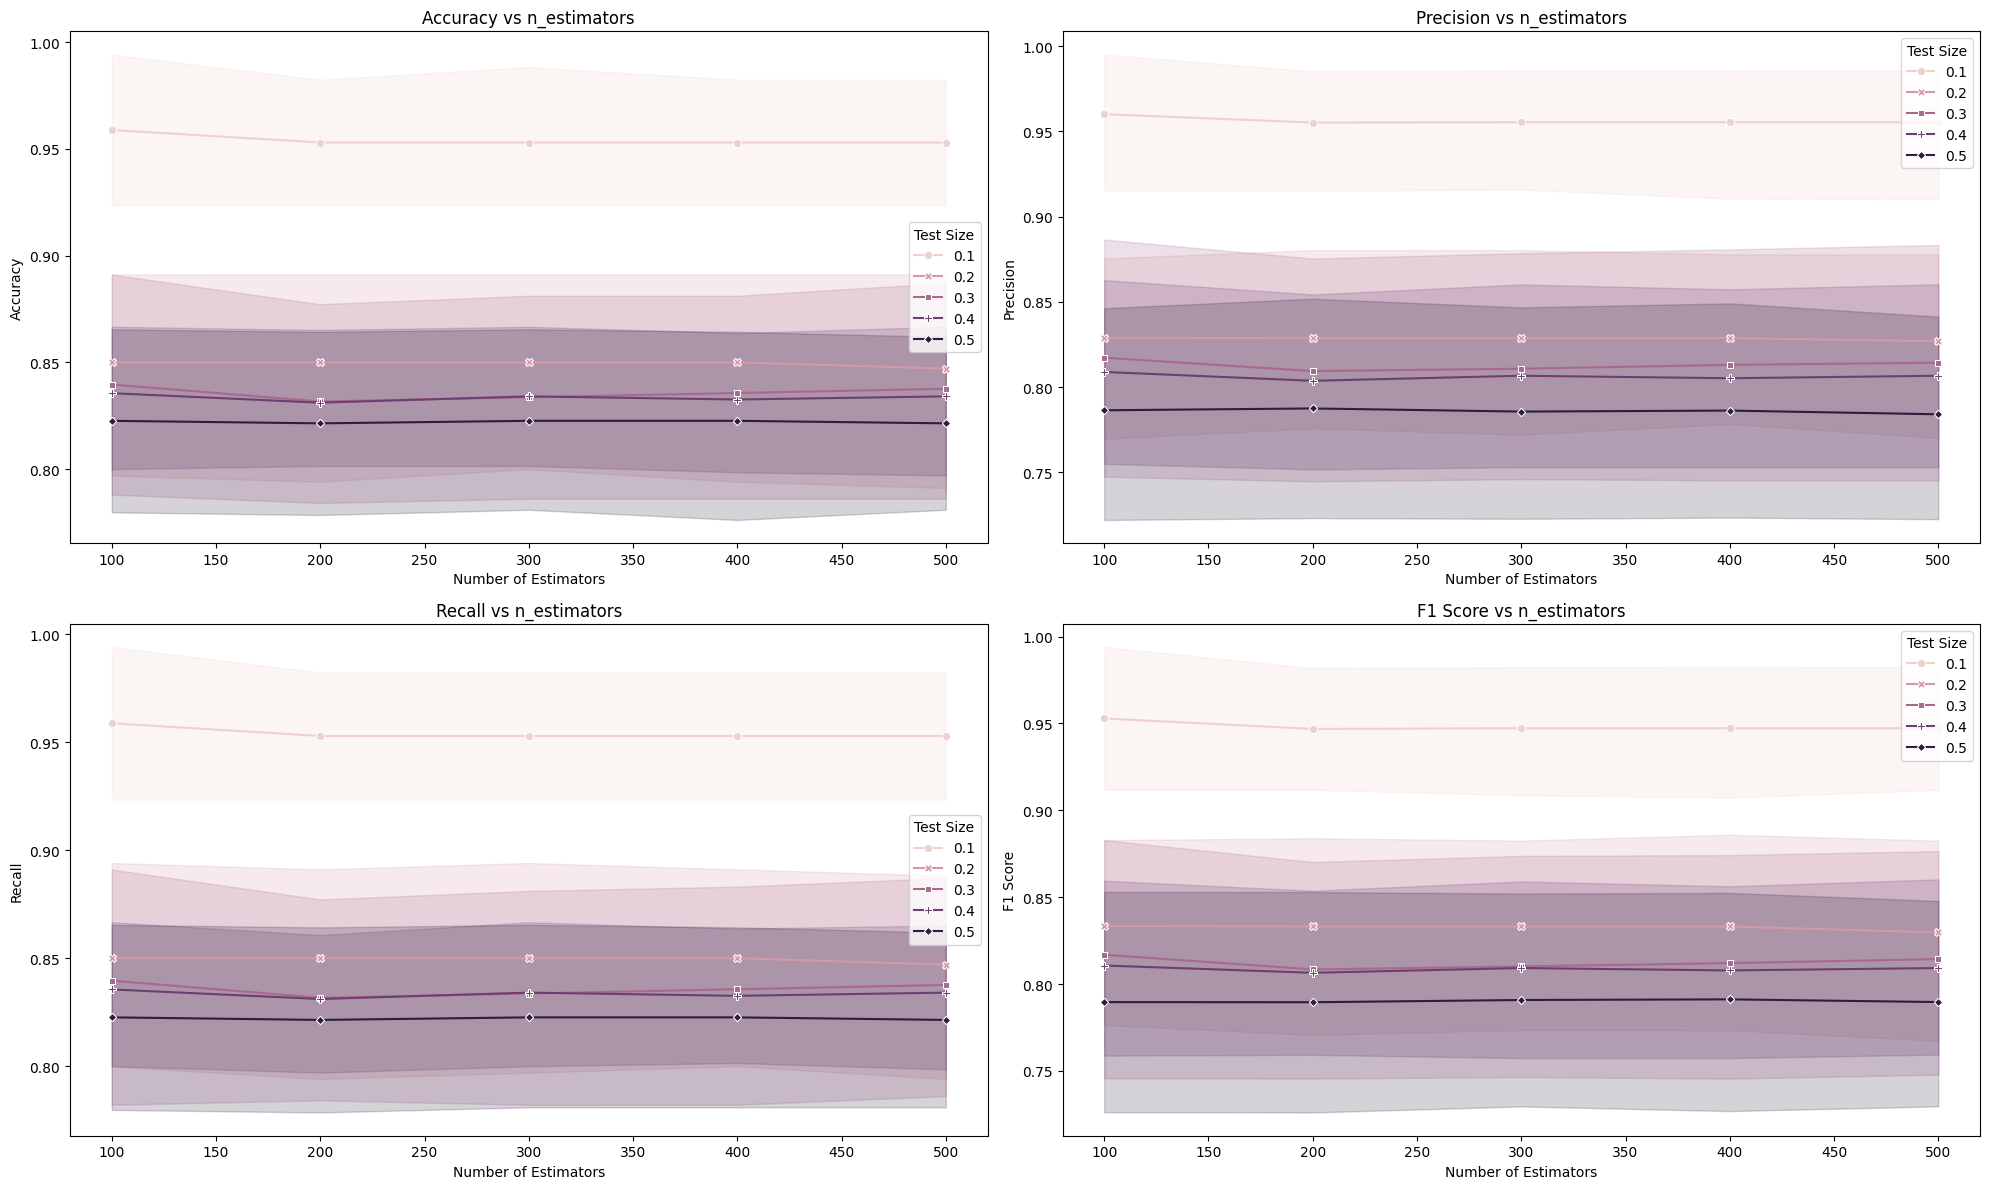

In [21]:
import seaborn as sns
# Plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(20, 12))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.lineplot(data=hasil, x='n_estimators', y=metric, hue='Test Size', style='Test Size', markers=True, dashes=False)
    plt.title(f'{metric} vs n_estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel(metric)
    plt.legend(title='Test Size')

plt.tight_layout()
plt.show()

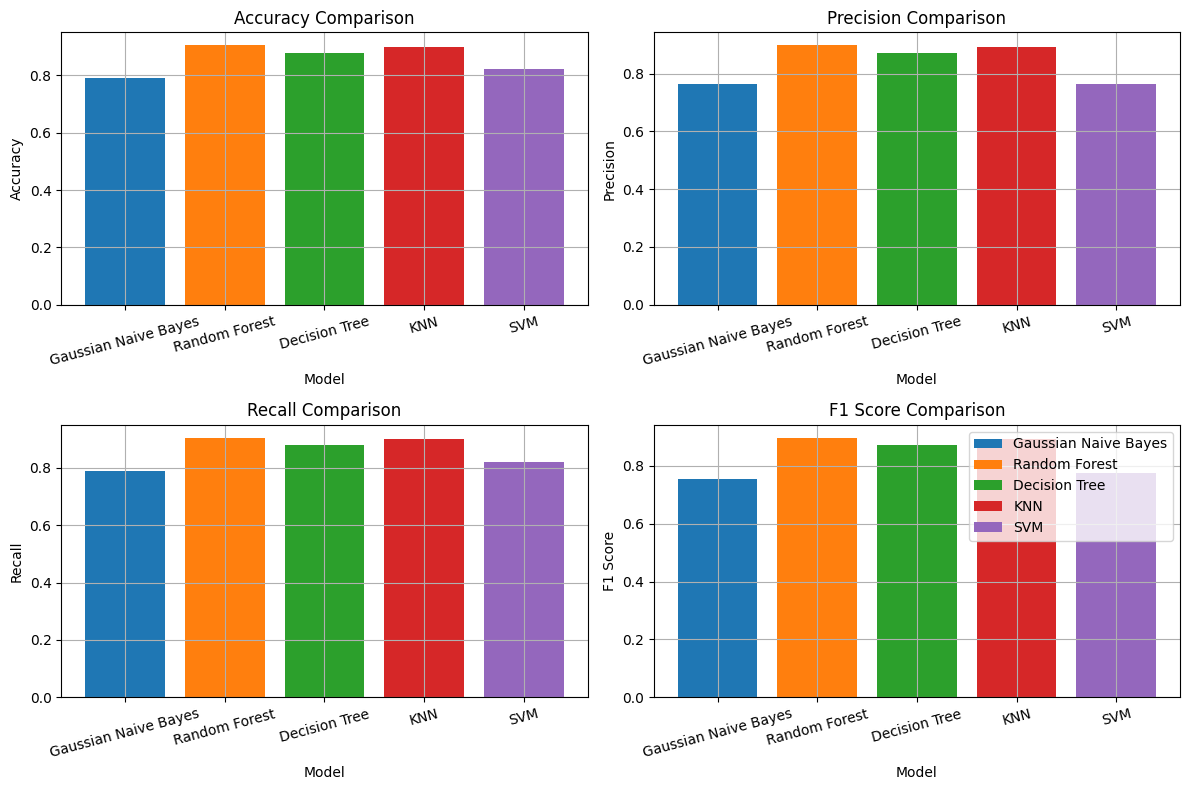

In [22]:
# Plotting barplots for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = hasil['Model'].unique()

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.title(metric + ' Comparison')

    for model in models:
        model_data = hasil[hasil['Model'] == model]
        plt.bar(model, model_data[metric].mean(), label=model)

    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=15)
    
    plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

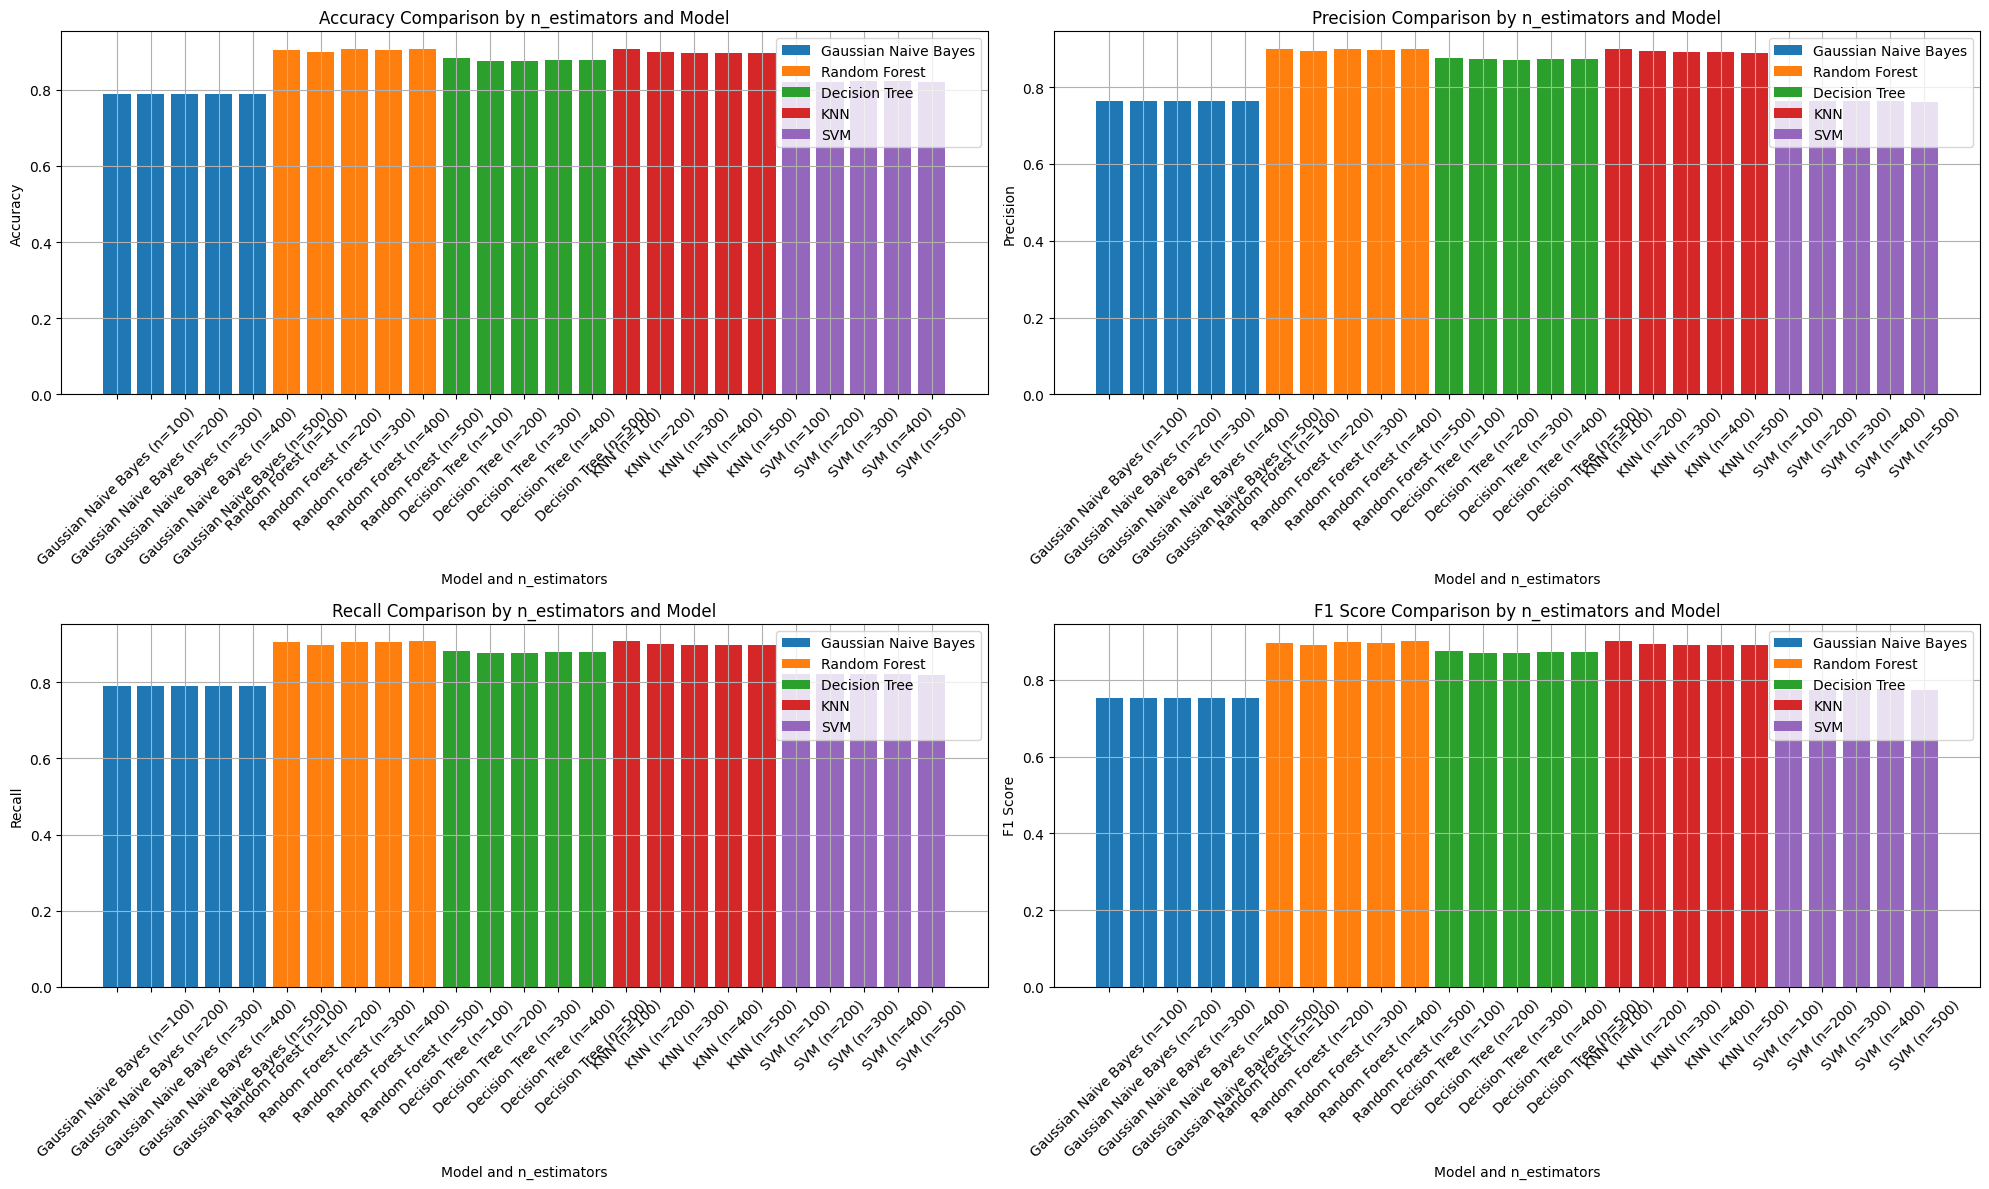

In [23]:
# Plotting barplots for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = hasil['Model'].unique()
n_estimators_values = hasil['n_estimators'].unique()

plt.figure(figsize=(20, 12))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.title(f'{metric} Comparison by n_estimators and Model')

    # Plot each model with different n_estimators values
    for model in models:
        model_data = hasil[hasil['Model'] == model]
        means = []
        for n_est in n_estimators_values:
            mean_value = model_data[model_data['n_estimators'] == n_est][metric].mean()
            means.append(mean_value)

        plt.bar(
            [f'{model} (n={n_est})' for n_est in n_estimators_values],
            means,
            label=model
        )

    plt.xlabel('Model and n_estimators')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Random Balance

Apa itu Random Balance ? 
Random Balance adalah sebuah Metode atau salah satu perkembangan dari Bagging, yang dimana Random Balance digunakan untuk menangani data yang tidak balance class atau label atau targetnya. Untuk bisa mengetahui apakah suatu kelas target atau kelas label itu balance atau tidak adalah dengan metode IR (Imbalance Ratio) yang dimana jika IR nya itu > 1.5 maka bisa dikatakan atribut atau kelas pada suatu data tersebut tidak balance.

Metode IR (Imbalance Ratio) dapat dihitung sebagai berikut : misal terdapat 2 kelas label, ada A dan B. Jumlah data secara keseluruhan adalah 1.000, kedua kelas tersebut memiliki masing-masing adalah A sebanyak 900 dan B sebanyak 100. Lalu bisa kita hitung untuk IR nya adalah (kelas tertinggi (jumlahnya)/kelas terendah (jumlahnya)). Jika IR nya lebih dari 1.5 si kelas tertinggi/ terbanyak, maka dapat disimpulkan bahwasannya kelas tersebut mengalami imbalance. 

Untuk memproses data yang imbalance tersebut terdapat beberapa cara, salah satunya adalah menggunakan teknik Random Balance ini. Dimana ketika kita menggunakan ini, secara otomatis data yang imbalance tadi akan ditangani sesuai kebutuhannya masing-masing.

In [30]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
X = data.iloc[:,0:7]
Y = data['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=10 )

In [27]:
base_estimator = DecisionTreeClassifier()
bbc = BalancedBaggingClassifier(estimator=base_estimator, n_estimators=100, sampling_strategy='auto',bootstrap_features=True, replacement=True, random_state=42)

In [29]:
bbc.fit(X_train, Y_train)

BalancedBaggingClassifier(bootstrap_features=True,
                          estimator=DecisionTreeClassifier(), n_estimators=100,
                          random_state=42, replacement=True)

In [31]:
Y_pred = bbc.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[27  0  0  0  0  0  1]
 [ 0 12  2  2  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  1  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  1  0 11]]
              precision    recall  f1-score   support

          cp       1.00      0.96      0.98        28
          im       0.92      0.75      0.83        16
         imS       0.00      0.00      0.00         0
         imU       0.75      0.86      0.80         7
          om       0.80      1.00      0.89         4
         omL       1.00      1.00      1.00         1
          pp       0.92      0.92      0.92        12

    accuracy                           0.90        68
   macro avg       0.77      0.78      0.77        68
weighted avg       0.93      0.90      0.91        68



d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz